# Simulating stock price values using geometric Brownian motion
### A.G.Liyanage - s15585

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import stats, norm, shapiro

# Part A

In [2]:
#Load the data set

df = pd.read_csv('HASU Historical Data(2).csv')
df.head()

,Date,Price,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,6/20/2022,32.2,NaN,NaN,NaN,NaN,NaN
1,6/21/2022,33.0,NaN,NaN,NaN,NaN,NaN
2,6/22/2022,33.0,NaN,NaN,NaN,NaN,NaN
3,6/23/2022,33.0,NaN,NaN,NaN,NaN,NaN
4,6/24/2022,35.0,NaN,NaN,NaN,NaN,NaN


In [3]:
#Finding the length of 'Price' column of dataset

N=len(df['Price'])
print(N)

498


In [4]:
#Creating the array from 0 to N as 'time_index'

time_index=np.arange(0,N,1)
print(time_index)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

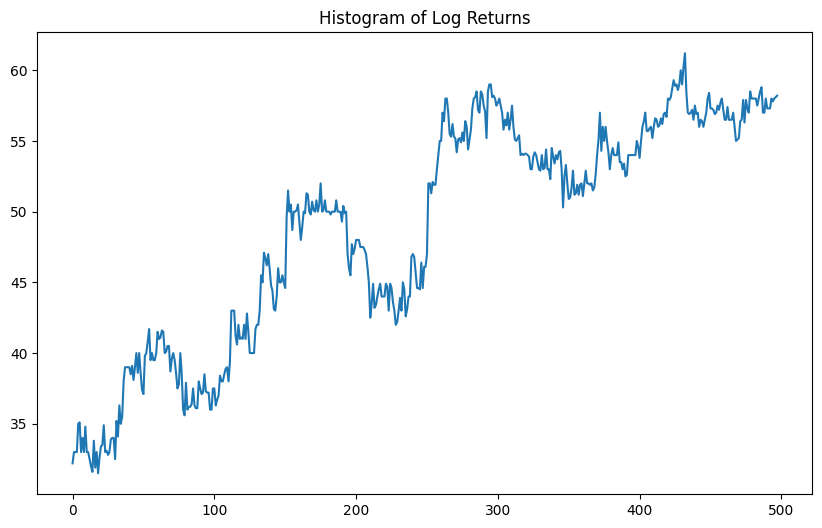

In [70]:
plt.figure(figsize=(10, 6))
plt.plot(time_index, df['Price'])
plt.title('Histogram of Log Returns')
plt.show()

# Part B

In [6]:
log_returns = np.log(df['Price'] / df['Price'].shift(1)).dropna()
print(log_returns)

1      0.024541
2      0.000000
3      0.000000
4      0.058841
5      0.002853
         ...   
493    0.012142
494   -0.003454
495    0.003454
496    0.001723
497    0.001720
Name: Price, Length: 497, dtype: float64


In [8]:
m = log_returns.mean()
var = log_returns.var()
print('mean :',m,'   ','variance :',var)

mean : 0.0011909837066137467     variance : 0.0005467189389938379


# Part C

In [61]:
m_gb = m + var/2
scale_parameter = var**(1/2)
print('scale parameter :',scale_parameter)
print('mu_gb :',m_gb)

mean : 0.0011909837066137467     variable : 0.0005467189389938379
scale parameter : 0.02338202170458829
mu_gb : 0.0014643431761106657


# Part D

## Check the distribution whether normal or not by using Shapiro test

In [10]:
stat, p = shapiro(log_returns)
print('Statistics = %.3f, p =%.3f'%(stat,p))
alpha = 0.05 
if p > alpha:
    print("Fail to reject null hypothesis")
else:
    print("Reject null hypothesis")  

Statistics = 0.964, p =0.000
Reject null hypothesis


## Check the distribution whether normal or not by ploting a graph

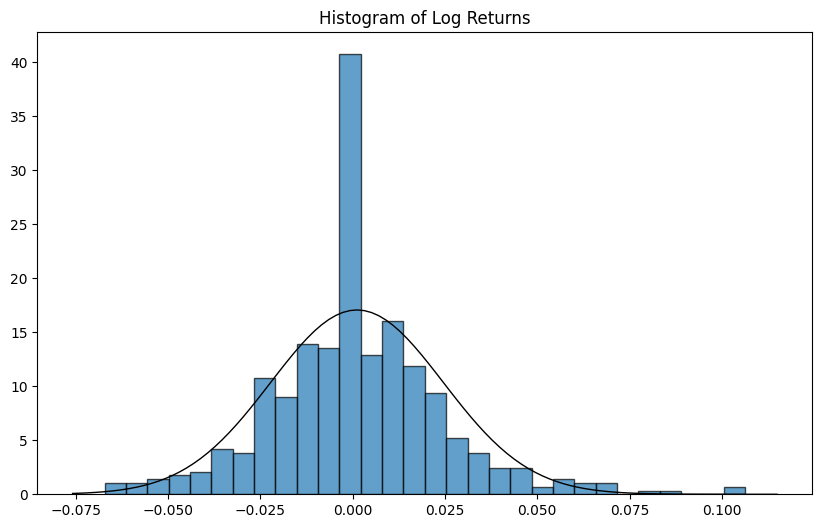

In [11]:
plt.figure(figsize=(10, 6))
plt.hist(log_returns, bins=30, alpha=0.7,edgecolor='black',density=True)
x_min, x_max = plt.xlim()
x = np.linspace(x_min, x_max, 100)
p = norm.pdf(x, log_returns.mean(), log_returns.std())
plt.plot(x, p,color='black', linewidth=1)
plt.title('Histogram of Log Returns')
plt.show()

# Part E

In [13]:
# Parameters 

num_simulations = 5000
num_days = 20
dt = 1  # time step
last_price = df['Price'].iloc[-1]
sigma = var**(1/2)

# Define the BrownianG function

def BrownianG(m, T, N, sigma, mu, w0, GB):
    dt = T / N
    x = np.zeros((m, N+1))
    x[:, 0] = w0
    x0 = x[:, 0]
    
    if not GB:
        r = norm.rvs(size=x0.shape + (N,), loc=mu * dt, scale=sigma * np.sqrt(dt))
        np.cumsum(r, axis=1, out=x[:, 1:])
        x[:, 1:] += w0
    else:
        r = norm.rvs(size=x0.shape + (N,), loc=mu * dt, scale=sigma * np.sqrt(dt))
        np.cumsum(r, axis=1, out=x[:, 1:])
        if w0 != 0:
            x[:, 1:] = w0 * np.exp(x[:, 1:])
        else:
            x[:, 1:] = np.exp(x[:, 1:])
    
    return x

# Simulate sample paths

simulated_paths = BrownianG(num_simulations, num_days, num_days, sigma, m, last_price, True)
simulated_paths_df = pd.DataFrame(simulated_paths.T)
print(simulated_paths_df)


58.2
         0          1          2          3          4          5     \
0   58.200000  58.200000  58.200000  58.200000  58.200000  58.200000   
1   57.742033  57.045958  59.086569  59.123681  57.278089  59.274924   
2   58.298663  56.922080  59.828753  59.758341  59.081734  60.076275   
3   59.353350  56.925471  61.096119  60.515116  59.714816  58.630607   
4   61.610036  58.100519  60.749695  60.405798  57.736031  61.491135   
5   61.066664  60.335578  60.364229  59.708720  58.495531  62.109479   
6   60.604019  60.668595  62.577489  58.359471  58.355441  63.470232   
7   62.108140  59.775976  61.919856  58.341756  57.178239  63.922083   
8   62.621328  58.105351  62.282887  58.139458  56.462159  65.160344   
9   61.875875  59.145343  61.601770  59.012078  57.018827  66.285463   
10  60.028950  60.811901  64.004415  57.807898  56.948880  64.741471   
11  60.470891  61.907478  62.311551  56.258382  57.839296  64.059910   
12  58.164408  61.328268  61.029746  57.188198  58.435448  

# Part F
#### Plotting a subset of the sample paths

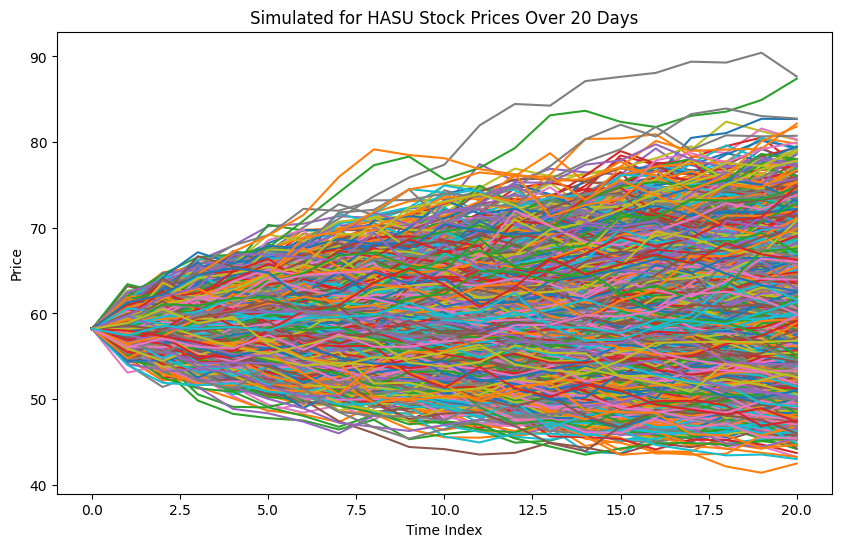

In [65]:
plt.figure(figsize=(10, 6))
plt.plot(simulated_paths_df)
plt.xlabel('Time Index')
plt.ylabel('Price')
plt.title('Simulated for HASU Stock Prices Over 20 Days')
plt.show()

# Part G

#### Plot the box plot for the closing prices on the last day

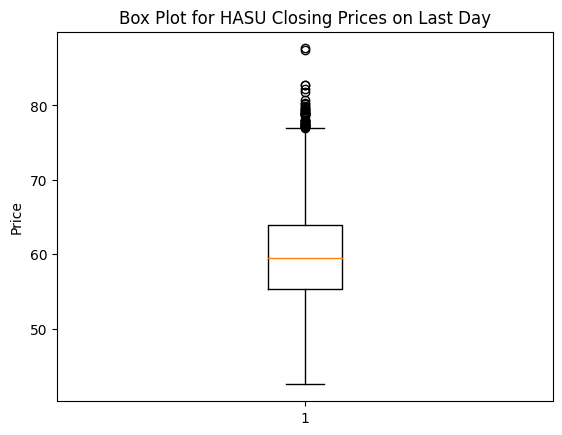

In [66]:
last_day_prices = simulated_paths_df.iloc[-1]
plt.boxplot(last_day_prices)
plt.title('Box Plot for HASU Closing Prices on Last Day')
plt.ylabel('Price')
plt.show()

# Part H

#### Calculate the probability for closing price between 55 and 60

In [67]:
prob_55_60 = ((last_day_prices >= 55) & (last_day_prices <= 60)).mean()
print(f"Probability for closing price between 55 and 60 is : {prob_55_60}")

Probability for closing price between 55 and 60 is : 0.2968


# Part I

In [68]:
prediction_interval_95 = np.percentile(last_day_prices, [2.5, 97.5])
print(f"95% prediction interval: {prediction_interval_95}")

95% prediction interval: [48.39453029 73.48056912]
